# Кластеризация клиентов
#### (по исходным данным конкурса Sberbank Data Challenge)


## Описание данных
На входе имеем CSV файл с 13 признаками (1 из них в дальнейшем исключим из обработки), CSV файл получен в результате предварительной исходных данных в MS SQL сервере.
### Исходные данные были "обогащены" дополнительными признаками - features, используя агрегатные функции PostgreSQL для облегчения кластеризации клиентов и возможного выделения клиентов использующих обнальные схемы.
###     Описание полей CSV файла:
####    1. customer_id - уникальный номер клиента
####    2. oborot_month - сумма среднемесячного оборота клиента
####    3. trans_month - среднемеячное количество транзакций  клиента
####    4. trans_vs_med - отношение среднемеячного количества транзакций  клиента к медиане по все клиентам
####    5. prih_month_all - среднемеячный приход средств клиента
####    6. prih_month_vs_med - отношение среднемесячной суммы прихода  клиента к медиане по все клиентам
####    7. prih_month_cash - среднемеячный приход наличных средств клиента
####    8. prih_cash_part - доля  среднемеячного прихода наличных средств в общей сумме прихода
####    9. rash_month_all - среднемеячный расход средств клиента
####    10. rash_month_vs_med - отношение среднемесячной суммы расхода  клиента к медиане по все клиентам
####    11. rash_month_cash - среднемеячный расход наличных средств клиента
####    12. rash_cash_part - доля  среднемеячного расхода наличных средств в общей сумме расходов
####    13. rash_prih_ratio - отношение среднемесячной суммы расхода  к приходу клиента

## Imports
#### Импортируем необходимые библиотеки

In [1]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
# для массштабирования признаков обучающей и тестовой выборки
from sklearn.preprocessing import StandardScaler


## Data Management
#### Загрузка данных

In [25]:
#Load the dataset
data_all = pd.read_csv('tb_customer_clstr_1500.gz', compression='gzip')

data_all.head()

,customer_id,oborot_month,trans_month,trans_vs_med,prih_month_all,prih_month_vs_med,prih_month_cash,prih_cash_part,rash_month_all,rash_month_vs_med,rash_month_cash,rash_cash_part,rash_prih_ratio
0,6815,444170.72,15.066666,0.695599,180436.860,0.898658,15736.384,0.087212,263733.88,0.400147,214110.640,0.811841,1.461633
1,22899,817842.88,15.600000,0.720222,387928.190,1.932059,278538.470,0.718014,429914.66,0.652283,182218.640,0.423847,1.108230
2,27914,253119.08,7.400000,0.341644,27325.313,0.136093,27325.313,0.999963,225793.77,0.342583,203929.160,0.903162,8.262870
3,28753,7864073.50,19.600000,0.904894,3047160.500,15.176246,274001.720,0.089920,4816913.00,7.308402,783495.190,0.162655,1.580787
4,31385,312178.16,24.333332,1.123423,83422.297,0.415481,28448.268,0.341011,228755.88,0.347077,94627.922,0.413662,2.742110


In [26]:
#X = data_all.drop(['customer_id', 'trans_month','prih_month_all','prih_month_cash',
#                                                'rash_month_all','rash_month_cash','rash_prih_ratio'], 1)
X = data_all.drop(['customer_id'], 1)

In [27]:
X.head()

,oborot_month,trans_month,trans_vs_med,prih_month_all,prih_month_vs_med,prih_month_cash,prih_cash_part,rash_month_all,rash_month_vs_med,rash_month_cash,rash_cash_part,rash_prih_ratio
0,444170.72,15.066666,0.695599,180436.860,0.898658,15736.384,0.087212,263733.88,0.400147,214110.640,0.811841,1.461633
1,817842.88,15.600000,0.720222,387928.190,1.932059,278538.470,0.718014,429914.66,0.652283,182218.640,0.423847,1.108230
2,253119.08,7.400000,0.341644,27325.313,0.136093,27325.313,0.999963,225793.77,0.342583,203929.160,0.903162,8.262870
3,7864073.50,19.600000,0.904894,3047160.500,15.176246,274001.720,0.089920,4816913.00,7.308402,783495.190,0.162655,1.580787
4,312178.16,24.333332,1.123423,83422.297,0.415481,28448.268,0.341011,228755.88,0.347077,94627.922,0.413662,2.742110


In [49]:
X.shape

(15000, 12)

In [35]:
# масштабируем признаки:
# standardize the data attributes
standardized_X = preprocessing.scale(X)

# normalize the data attributes
clus_train = preprocessing.normalize(X)
#clus_train = preprocessing.scale(X)

clus_train

array([[  7.55668205e-01,   2.56329378e-05,   1.18342277e-06, ...,
          3.64266701e-01,   1.38118531e-06,   2.48667738e-06],
       [  7.74530358e-01,   1.47738323e-05,   6.82079030e-07, ...,
          1.72568438e-01,   4.01400678e-07,   1.04953835e-06],
       [  6.36523227e-01,   1.86089170e-05,   8.59137397e-07, ...,
          5.12824426e-01,   2.27119698e-06,   2.07787913e-05],
       ..., 
       [  7.70414388e-01,   2.39376759e-05,   1.10515587e-06, ...,
          2.37437994e-01,   1.88748218e-07,   1.06323779e-06],
       [  7.28287409e-01,   5.64095851e-06,   2.60432063e-07, ...,
          3.37691130e-01,   3.11633328e-07,   5.65012217e-07],
       [  6.98742332e-01,   9.90518053e-06,   4.57302929e-07, ...,
          4.25417970e-01,   2.78771225e-07,   1.37520330e-06]])

## Определение возможного количества кластеров
#### Запускаем k-means cluster analysis для 1-15 clusters

In [38]:
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    #Adding average euclidean distance between the model.cluster_centers_, the cluster centroids from the model results, to array.
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

## Plotting
### Для определения количества кластеров отрисовываем средние евклидовы расстояния до каждого элемента от центроида кластера, используя метод Elbow.

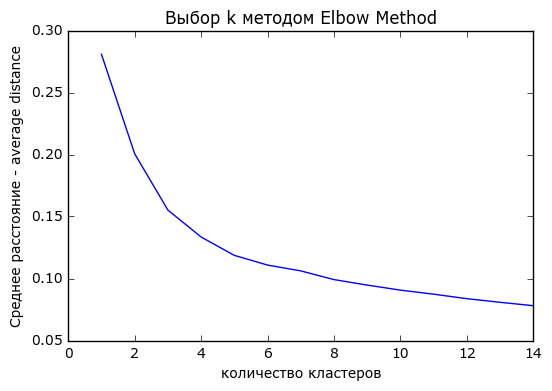

In [39]:
import matplotlib
matplotlib.rc('font', family='Verdana')

plt.plot(clusters, meandist)
plt.xlabel(u'количество кластеров')
plt.ylabel(u'Среднее расстояние - average distance')
plt.title(u'Выбор k методом Elbow Method')

### Таким образом, предположительно в данных можно выделить 4-5 кластеров
Далее  для кластеризации данных будем использовать алгоритм KMeans, а для визуального отображения результатов кластеризации (понижение размерности или проецирование многомерных данных кластеров на плоскость) различные методы: Random projection, RandomizedPCA и TSNE.

# Interpreting the 4 Cluster Solution Random projection

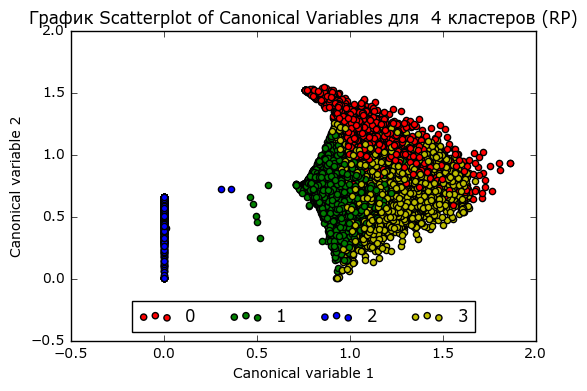

In [40]:
model4=KMeans(n_clusters=4)
model4.fit(clus_train)
# plot clusters

from sklearn import random_projection
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
plot_columns = projection.fit_transform(clus_train)

#Merge pca results with cluster_ids for future reference
pca_clusters_rp4 = pd.DataFrame({'x':plot_columns[:,0],'y':plot_columns[:,1],'cluster':model4.labels_[:]})

#Adding a legend with labels
colors= ['r','g','b','y']
#hsv = plt.get_cmap('hsv')
#colors = hsv(np.linspace(0, 1.0, 4))


#Create empty array of objects to receive plots
c = [None] * 4

for i in range(0, plot_columns.shape[0]):
    c[model4.labels_[i]] =  plt.scatter(x=plot_columns[i,0], y=plot_columns[i,1], c=colors[model4.labels_[i]],label=model4.labels_[i])

import matplotlib
matplotlib.rc('font', family='Verdana')
    
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.legend(c, ['0','1','2','3'],loc='lower center', ncol=4)
plt.title(u'График Scatterplot of Canonical Variables для  4 кластеров (RP)')
plt.show()

In [41]:
# cluster frequencies
pca_clusters_rp4.cluster.value_counts()

1    5422
3    4987
0    3350
2    1241
Name: cluster, dtype: int64

# Interpreting the 4 Cluster Solution RandomizedPCA

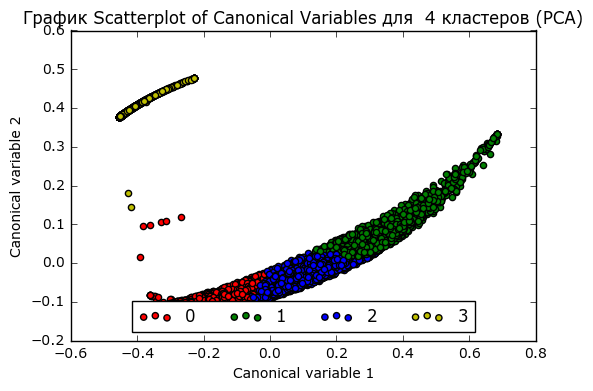

In [42]:
model4=KMeans(n_clusters=4)
model4.fit(clus_train)
# plot clusters

from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components = 2, random_state = 0)
plot_columns = pca.fit_transform(clus_train)

#Merge pca results with cluster_ids for future reference
pca_clusters_pca4 = pd.DataFrame({'x':plot_columns[:,0],'y':plot_columns[:,1],'cluster':model4.labels_[:]})

#Adding a legend with labels
colors= ['r','g','b','y']
#hsv = plt.get_cmap('hsv')
#colors = hsv(np.linspace(0, 1.0, 4))


#Create empty array of objects to receive plots
c = [None] * 4

for i in range(0, plot_columns.shape[0]):
    c[model4.labels_[i]] =  plt.scatter(x=plot_columns[i,0], y=plot_columns[i,1], c=colors[model4.labels_[i]],label=model4.labels_[i])

import matplotlib
matplotlib.rc('font', family='Verdana')
    
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.legend(c, ['0','1','2','3'],loc='lower center', ncol=4)
plt.title(u'График Scatterplot of Canonical Variables для  4 кластеров (PCA)')
plt.show()

In [43]:
# cluster frequencies
pca_clusters_pca4.cluster.value_counts()

0    5422
2    4987
1    3350
3    1241
Name: cluster, dtype: int64

# Interpreting the 4 Cluster Solution TSNE

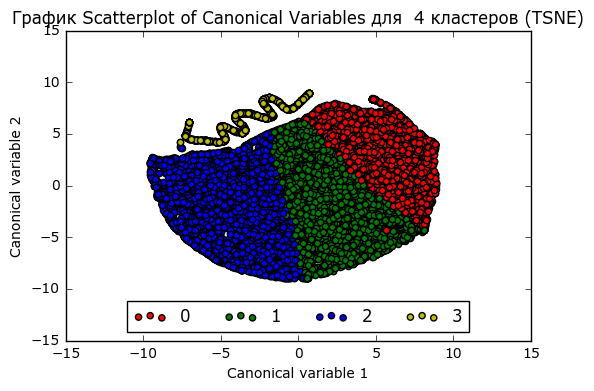

In [45]:
model4=KMeans(n_clusters=4)
model4.fit(clus_train)
# plot clusters

from sklearn import manifold
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
plot_columns = tsne.fit_transform(clus_train)


#Merge pca results with cluster_ids for future reference
pca_clusters_tsne4 = pd.DataFrame({'x':plot_columns[:,0],'y':plot_columns[:,1],'cluster':model4.labels_[:]})

#Adding a legend with labels
colors= ['r','g','b','y']
#hsv = plt.get_cmap('hsv')
#colors = hsv(np.linspace(0, 1.0, 4))


#Create empty array of objects to receive plots
c = [None] * 4

for i in range(0, plot_columns.shape[0]):
    c[model4.labels_[i]] =  plt.scatter(x=plot_columns[i,0], y=plot_columns[i,1], c=colors[model4.labels_[i]],label=model4.labels_[i])

import matplotlib
matplotlib.rc('font', family='Verdana')
    
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.legend(c, ['0','1','2','3'],loc='lower center', ncol=4)
plt.title(u'График Scatterplot of Canonical Variables для  4 кластеров (TSNE)')
plt.show()

In [46]:
# cluster frequencies
pca_clusters_tsne4.cluster.value_counts()

2    5422
1    4987
0    3350
3    1241
Name: cluster, dtype: int64

# Interpreting the 5 Cluster Solution TSNE

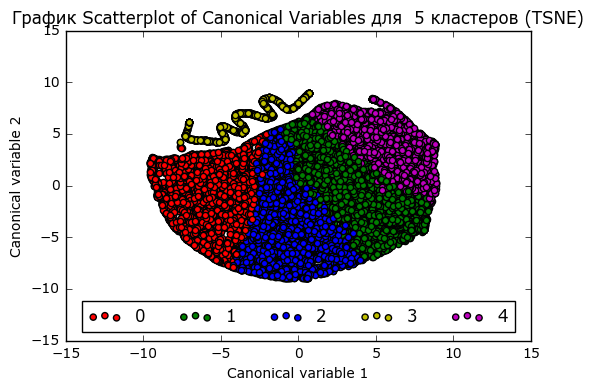

In [47]:
model5=KMeans(n_clusters=5)
model5.fit(clus_train)
# plot clusters

from sklearn import manifold
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
plot_columns = tsne.fit_transform(clus_train)


#Merge pca results with cluster_ids for future reference
pca_clusters_tsne5 = pd.DataFrame({'x':plot_columns[:,0],'y':plot_columns[:,1],'cluster':model5.labels_[:]})

#Adding a legend with labels
colors= ['r','g','b','y','m']
#hsv = plt.get_cmap('hsv')
#colors = hsv(np.linspace(0, 1.0, 4))


#Create empty array of objects to receive plots
c = [None] * 5

for i in range(0, plot_columns.shape[0]):
    c[model5.labels_[i]] =  plt.scatter(x=plot_columns[i,0], y=plot_columns[i,1], c=colors[model5.labels_[i]],label=model5.labels_[i])

import matplotlib
matplotlib.rc('font', family='Verdana')
    
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.legend(c, ['0','1','2','3','4'],loc='lower center', ncol=5)
plt.title(u'График Scatterplot of Canonical Variables для  5 кластеров (TSNE)')
plt.show()

In [48]:
# cluster frequencies
pca_clusters_tsne5.cluster.value_counts()

1    3874
2    3854
0    3606
4    2425
3    1241
Name: cluster, dtype: int64

### Лучшие результата визуализации кластеризации показал метод TSNE (t-distributed stochastic neighbor embedding). Исходя из проведенного кластерного анализа следует обратить внимание на группу из 1241 клиента оказавшуюся в 3 (желтом) кластере, данные которых значительно отличаются от остальных клиентов.